In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression


data = pd.read_csv('Default.csv')
income = data['income']
balance = data['balance']
default = data['default']
student = data['student']
dno = (default == 'No')
dnno = (default == 'Yes')
graphx = balance[dno]
graphy = income[dno]
graphx = graphx[0:len(graphx)//4-1000] #Se grafica solo un porcentaje de los datos pues al haber un desbalance de clases
graphy = graphy[0:len(graphy)//4-1000] #Entre 'Yes' y 'No' para default, la gráfica se ve muy desagradable y no corresponde con la del libro.

plt.scatter(graphx, graphy, alpha=0.8, marker='o', s=15, facecolors='none', edgecolors='dodgerblue')
plt.scatter(balance[dnno], income[dnno], color = 'orange', marker='+')
plt.xlabel("Balance", fontsize = 20)
plt.ylabel("Income", fontsize = 20)
plt.savefig('fig41a.png', bbox_inches='tight')

h = plt.figure(figsize=(2,6))
ax = h.add_subplot(111)
ax.set_xlabel('Default',fontsize=15)
ax.set_ylabel('Balance',fontsize=15)
bp = ax.boxplot([balance[dno],balance[dnno]],patch_artist=True, widths=0.8)
bp['boxes'][0].set( facecolor = 'dodgerblue' )
bp['boxes'][1].set( facecolor = 'chocolate' )
ax.set_xticklabels(['No','Yes'])

bp['medians'][0].set( color = 'black' ,linewidth=2)
bp['medians'][1].set( color = 'black',linewidth=2 )
plt.savefig('fig41b.png', bbox_inches='tight')

h = plt.figure(figsize=(2,6))
ax = h.add_subplot(111)
ax.set_xlabel('Default',fontsize=15)
ax.set_ylabel('Income',fontsize=15)
bp = ax.boxplot([income[dno],income[dnno]],patch_artist=True, widths=0.8)
bp['boxes'][0].set( facecolor = 'dodgerblue' )
bp['boxes'][1].set( facecolor = 'chocolate' )
ax.set_xticklabels(['No','Yes'])

bp['medians'][0].set( color = 'black',linewidth=2 )
bp['medians'][1].set( color = 'black',linewidth=2 )
plt.savefig('fig41c.png', bbox_inches='tight')




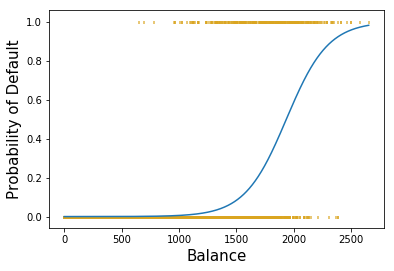

In [2]:
h = plt.figure()
X = balance.values.reshape(-1,1)
y = default
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X, y)
x = np.linspace(0,np.max(balance),len(balance))
x42 = x.reshape(-1, 1)
y42 = clf.predict_proba(x42)
y42real = np.copy(x)
y42real[dno] = 0
y42real[dnno] = 1
plt.scatter(balance,y42real,alpha=0.8, marker='|', s=9, facecolors='goldenrod')
plt.plot(x,y42[:,1])
plt.xlabel('Balance', fontsize=15)
plt.ylabel('Probability of Default', fontsize=15)
plt.savefig('fig42.png', bbox_inches='tight', dpi = 500)


/home/clarko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


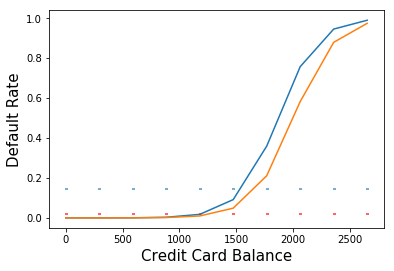

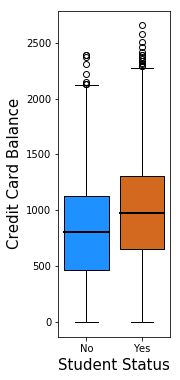

In [3]:
x2 = np.linspace(0,np.max(balance),10) #Hago la gráfica con pocos puntos porque así es la del libro. Fácilmente podría ser una curvo lisa con más puntos.
eno = (student == 'No')
enno = (student == 'Yes')

h = plt.figure()
X = balance.values.reshape(-1,1)

y = default
X2 = data[['balance','income','student']]
#X2.student.replace(['Yes', 'No'], [1, 0], inplace=True)
X2['student'] = X2['student'].map({'Yes': 1, 'No': 0})
clfA = LogisticRegression(random_state=0, solver='lbfgs').fit(X[eno], y[eno])
clfB = LogisticRegression(random_state=0, solver='lbfgs').fit(X[enno], y[enno])
clfC = LogisticRegression(random_state=0).fit(X2[eno], y[eno])
clfD = LogisticRegression(random_state=0).fit(X2[enno], y[enno])
x = np.linspace(0,np.max(balance),len(balance))
x42 = x2.reshape(-1, 1)
y42A = clfA.predict_proba(x42)
y42B = clfB.predict_proba(x42)
y42D = clfC.predict_proba(X2)
y42C = clfD.predict_proba(X2)
aveEstu=np.mean(y42C[:,1])
aveNoEstu=np.mean(y42D[:,1])
dotEstu = np.array([aveEstu]*len(x2))
dotNoEstu = np.array([aveNoEstu]*len(x2))
plt.scatter(x2,dotEstu,alpha=0.8, marker='_', s=9, color = 'r')
plt.scatter(x2,dotNoEstu,alpha=0.8, marker='_', s=9,)

#plt.scatter(balance,y42real,alpha=0.8, marker='|', s=9, facecolors='goldenrod')
plt.plot(x2,y42A[:,1])#No estudiantes
plt.plot(x2,y42B[:,1])#Estudiantes
plt.xlabel('Credit Card Balance', fontsize=15)
plt.ylabel('Default Rate', fontsize=15)
plt.savefig('fig43a.png', bbox_inches='tight', dpi = 500)





h = plt.figure(figsize=(2,6))
ax = h.add_subplot(111)
ax.set_xlabel('Student Status',fontsize=15)
ax.set_ylabel('Credit Card Balance',fontsize=15)
bp = ax.boxplot([balance[dno],balance[enno]],patch_artist=True, widths=0.8)
bp['boxes'][0].set( facecolor = 'dodgerblue' )
bp['boxes'][1].set( facecolor = 'chocolate' )
ax.set_xticklabels(['No','Yes'])

bp['medians'][0].set( color = 'black',linewidth=2 )
bp['medians'][1].set( color = 'black',linewidth=2 )
plt.savefig('fig43b.png', bbox_inches='tight')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.5, random_state=43)
reg11 = LogisticRegression(random_state=0).fit(X_train, y_train)
confTrain = np.array([[0,0],[0,0]])
confTest = np.array([[0,0],[0,0]])

ny_train = reg11.predict(X_train)
ny_test = reg11.predict(X_test)
for i in range(len(y_train)):
    if(y_train.iat[i] == 'Yes'):
        if(ny_train[i] == 'Yes'):
            confTrain[0][0] += 1
        else:
            confTrain[1][0] += 1
    else:
        if(ny_train[i] == 'Yes'):
            confTrain[0][1] += 1
        else:
            confTrain[1][1] += 1

for i in range(len(y_test)):
    if(y_test.iat[i] == 'Yes'):
        if(ny_test[i] == 'Yes'):
            confTest[0][0] += 1
        else:
            confTest[1][0] += 1
    else:
        if(ny_train[i] == 'Yes'):
            confTest[0][1] += 1
        else:
            confTest[1][1] += 1           

print('Matriz de confusión para Train')      
print(confTrain)
print('Matriz de confusión para Test')      
print(confTest)

Matriz de confusión para Train
[[   0    2]
 [ 161 4837]]
Matriz de confusión para Test
[[   0    2]
 [ 172 4826]]


Se observa que el algoritmo NO es un buen clasificador para estos datos pues en las matrices de confusión no logra clasificar correctamente ningún casos en donde sí hay default. En general, clasifica la mayoría de datos como NO default independiente de todo.

In [8]:
datos = pd.read_csv('Smarket.csv')
y_trainB = datos[datos['Year']<2005]
y_testB = datos[datos['Year']>=2005]

X_trainB = y_trainB[['Year','Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume','Today']]
y_trainB = y_trainB['Direction']

X_testB = y_testB[['Year','Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume','Today']]
y_testB = y_testB['Direction']

reg12 = LogisticRegression(random_state=0).fit(X_trainB, y_trainB)
confTrain = np.array([[0,0],[0,0]])
confTest = np.array([[0,0],[0,0]])

ny_trainB = reg11.predict(X_trainB)
ny_testB = reg11.predict(X_testB)

for i in range(len(y_trainB)):
    if(y_trainB.iat[i] == 'Yes'):
        if(ny_trainB[i] == 'Yes'):
            confTrain[0][0] += 1
        else:
            confTrain[1][0] += 1
    else:
        if(ny_trainB[i] == 'Yes'):
            confTrain[0][1] += 1
        else:
            confTrain[1][1] += 1

for i in range(len(y_testB)):
    if(y_test.iat[i] == 'Yes'):
        if(ny_testB[i] == 'Yes'):
            confTest[0][0] += 1
        else:
            confTest[1][0] += 1
    else:
        if(ny_testB[i] == 'Yes'):
            confTest[0][1] += 1
        else:
            confTest[1][1] += 1           

print('Matriz de confusión para Train')      
print(confTrain)
print('Matriz de confusión para Test')      
print(confTest)

Matriz de confusión para Train
[[  0   0]
 [  0 998]]
Matriz de confusión para Test
[[  0   0]
 [  8 244]]
